# Analysis of Workshops

WearAQ's first workshop took place at the Tower Hamlets council on Wednesday, March 14th. This notebook runs through some tests with and analysis of the data - both from the participants and the Airbeam device.

First, let's just load libraries and then move on to Workshop 1

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pymc as pm

# for plots
from pymc.Matplot import plot as mcplot
from matplotlib import pyplot as plt
import matplotlib as mpl
from IPython.core.pylabtools import figsize


Now read in the data we have so far from the different workshops

# Workshop 1
## Reading in the data

In [18]:
# Read in Airbeam data

filenames = os.listdir("data/Workshop Data/Workshop 1")
print(filenames)

for i in range(len(filenames)):
    filenames[i] = "data/Workshop Data/Workshop 1/" + filenames[i]

w1 = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    w1[i]["Timestamp"] = pd.to_datetime(w1[i].Timestamp)

print()   

# Read in the data
w1_percep = pd.read_csv("data/Workshop data/Perception/W1_perception.csv",float_precision = 'high')

# Check the results
print(w1_percep.head(5))

['Airbeam V1 - Temperature.csv', 'Airbeam V1 - PM2.5.csv', 'Airbeam V1 - Humidity.csv']

      source  Location  gesture       lon        lat
0   Device 1         1        1 -0.006205  51.509988
1  Device 10         1        4 -0.004851  51.510117
2  Device 12         1        5 -0.004498  51.509808
3  Device 13         1        4 -0.006051  51.510064
4  Device 15         1        2 -0.004816  51.509993


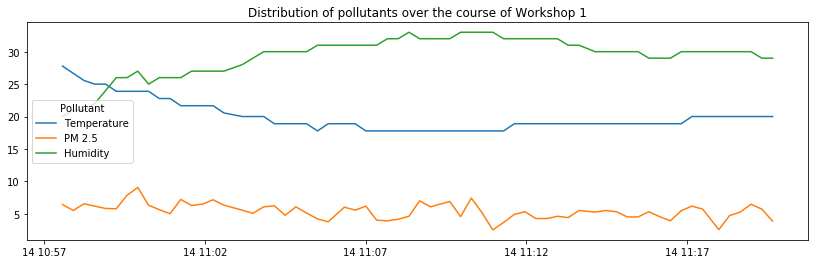

In [19]:
figsize(14, 4)

plt.plot(w1[0].Timestamp[::20],((w1[0].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w1[1].Timestamp[::20],w1[1].Value[::20], label = "PM 2.5")
plt.plot(w1[2].Timestamp[::20],w1[2].Value[::20], label = "Humidity")
plt.legend(title="Pollutant", loc="best")
plt.title("Distribution of pollutants over the course of Workshop 1")
plt.yscale('linear')
plt.show()

This data was already cleaned up a little before processing here. The location column was added and erroneous values removed. However there are still some pieces of data missing. Lets take a look at a brief summary

In [22]:
w1_percep.describe().head(1) # Look at count of data
w1_percep.head()

,source,Location,gesture,lon,lat
0,Device 1,1,1,-0.006205,51.509988
1,Device 10,1,4,-0.004851,51.510117
2,Device 12,1,5,-0.004498,51.509808
3,Device 13,1,4,-0.006051,51.510064
4,Device 15,1,2,-0.004816,51.509993


We registerd a total of 84 measurements by location and gesture, however we are missing 23 values for locations. This is because, as part of the experiment we have a *neutral* point for *OK* air quality. This is not associated with any gesture that is recorded in the tables. As such, if over the course of a walk we notice that there is no gesture associated with a variable at that point, then we add in a reading of *Gesture 3* at that location. Therefore, we force the **lon** and **lat** at those points to the **lon/lat** of the location. So, to clean this up a little:

## Clean up

In [4]:
# Initialize locations for the firt workshop
w1_loc = np.array([[ 51.509841, -0.0047257],
       [ 51.510383, -0.003696],
       [ 51.511037, -0.002661],
       [ 51.511411, -0.003664],
       [ 51.510954, -0.004286],
       [ 51.510426, -0.005086]])


w1_loc = pd.DataFrame(w1_loc)
w1_loc.columns = ['lat','lon']
w1_loc.index += 1

w1.loc[w1['lon'].isnull(),'lon'] = w1['Location'].map(w1_loc.lon)
w1.loc[w1['lat'].isnull(),'lat'] = w1['Location'].map(w1_loc.lat)

w1.describe().head(1) 

,Location,gesture,lon,lat
count,84.0,84.0,84.0,84.0


There we go. Now we have a cleaner dataset and we can work on looking at the perception data in comparison with the data that we read in.

### Plot the data

# Workshop 2

In [6]:
# Read in Airbeam data

filenames = os.listdir("data/Workshop Data/Workshop 2")

for i in range(len(filenames)):
    # print(i, " - ", filenames[i])
    filenames[i] = "data/Workshop Data/Workshop 2/" + filenames[i]

    
w2 = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    w2[i]["Timestamp"] = pd.to_datetime(w2[i].Timestamp)

print()   

# Read in the data
w2_percep = pd.read_csv("data/Workshop data/Perception/W2_perception_clean.csv",float_precision = 'high')

# Check the results
# print(w2_percep.head(5))
print(len(w2[9]), len(w2[12]))


1757 1790


Look at plotting the data to get an idea of the distribution and ups and downs of the variables over the course of the second workshop. There were 2 newer versions of the airbeams during this round. We were able to collect a few more value kinds such as PM 10 and PM 1. 

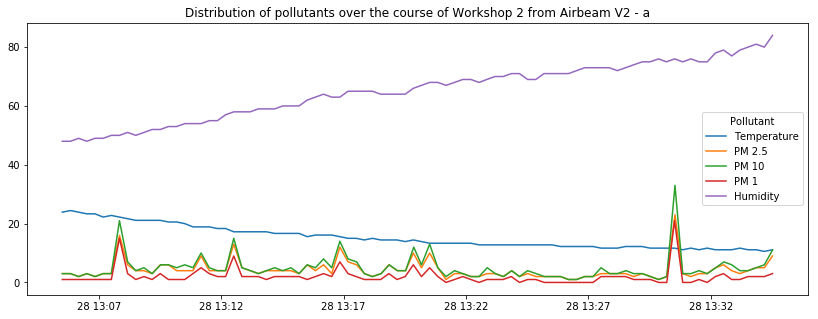

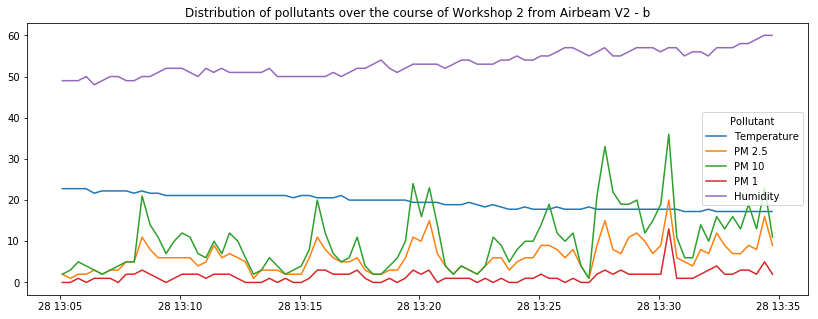

In [55]:
figsize(14, 5)

plt.plot(w2[9].Timestamp[::20],((w2[9].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w2[11].Timestamp[::20],w2[11].Value[::20], label = "PM 2.5")
plt.plot(w2[7].Timestamp[::20],w2[7].Value[::20], label = "PM 10")
plt.plot(w2[3].Timestamp[::20],w2[3].Value[::20], label = "PM 1")
plt.plot(w2[2].Timestamp[::20],w2[2].Value[::20], label = "Humidity")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 2 from Airbeam V2 - a")
plt.yscale('linear')
plt.show()

plt.plot(w2[12].Timestamp[::20],((w2[12].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w2[1].Timestamp[::20],w2[1].Value[::20], label = "PM 2.5")
plt.plot(w2[4].Timestamp[::20],w2[4].Value[::20], label = "PM 10")
plt.plot(w2[10].Timestamp[::20],w2[10].Value[::20], label = "PM 1")
plt.plot(w2[5].Timestamp[::20],w2[5].Value[::20], label = "Humidity")
plt.legend(title="Pollutant", loc="best")
plt.title("Distribution of pollutants over the course of Workshop 2 from Airbeam V2 - b")
plt.yscale('linear')
plt.show()

In [7]:
w2_percep.head(10)
2
plt.hist(w2_percep.location,w2_percep.gesture, bins = 6, normed = True, label = "Gesture")


TypeError: hist() got multiple values for argument 'bins'

# Workshop 3

In [24]:
# Read in Airbeam data

filenames = os.listdir("data/Workshop Data/Workshop 3")

for i in range(len(filenames)):
    # print(i, " - ", filenames[i])
    filenames[i] = "data/Workshop Data/Workshop 3/" + filenames[i]

w3 = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    w3[i]["Timestamp"] = pd.to_datetime(w3[i].Timestamp)
    
print()
    
# Read in the data
w3_percep = pd.read_csv("data/Workshop data/Perception/W3_perception_clean.csv",float_precision = 'high')

# Check the results
# print(w3_percep.head(5))
print("Airbeam V2 - a length -", len(w3[10]))
print("Airbeam V2 - b length -", len(w3[13]))


Airbeam V2 - a length - 662
Airbeam V2 - b length - 2146


Note that in Workshop 3 Airbeam V2 - b is equal to Airbeam V2 - a in workshop 1. The consistency of the airbeams isn't completely accurate from experiment to experiment. The Airbeam sensors seem to be acting up so this indeed can be a flaw in the method.

Also to note is that Airbeam b took a significantly larger amount of values, about 4 times more. In this case, 2 methods to deal with this present themselves. Firstly, impute the missing values or secondly, discard the dataset from Airbeam V2 - a and use just a workable dataset. In this case, I'm inclined to the latter as the dataset seems clean. 

Same in Workshop 2, the data seems best from the Airbeam V2 - b. However since the length of both datasets is about similar, the 2 can be averaged to give a better dataset to work with.

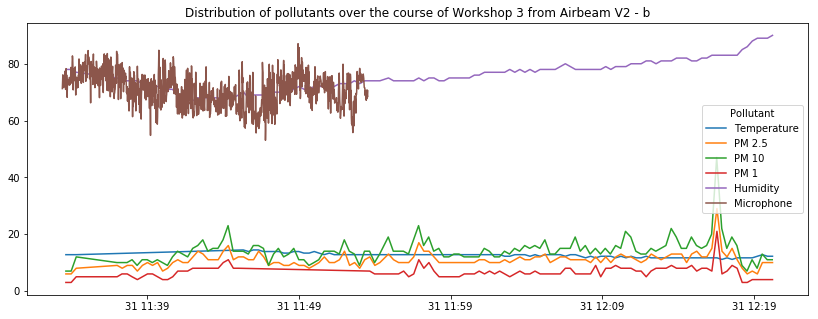

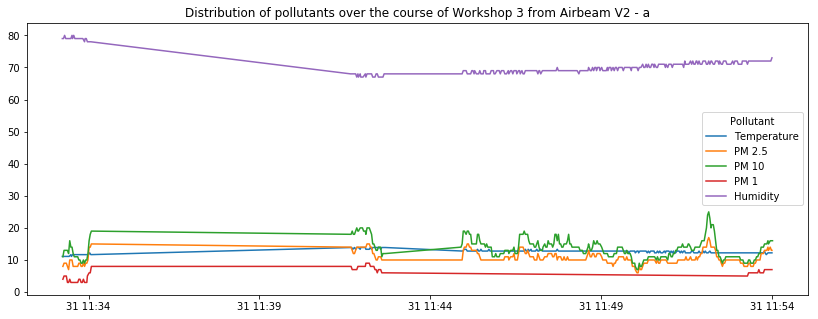

In [71]:
figsize(14, 5)

plt.plot(w3[13].Timestamp[::20],((w3[13].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w3[1].Timestamp[::20],w3[1].Value[::20], label = "PM 2.5")
plt.plot(w3[2].Timestamp[::20],w3[2].Value[::20], label = "PM 10")
plt.plot(w3[11].Timestamp[::20],w3[11].Value[::20], label = "PM 1")
plt.plot(w3[6].Timestamp[::20],w3[6].Value[::20], label = "Humidity")
plt.plot(w3[0].Timestamp[::2],w3[0].Value[::2], label = "Microphone")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 3 from Airbeam V2 - b")
plt.yscale('linear')
plt.show()

plt.plot(w3[10].Timestamp[::2],((w3[10].Value[::2]-32)*5)/9, label = "Temperature")
plt.plot(w3[12].Timestamp[::2],w3[12].Value[::2], label = "PM 2.5")
plt.plot(w3[8].Timestamp[::2],w3[8].Value[::2], label = "PM 10")
plt.plot(w3[4].Timestamp[::2],w3[4].Value[::2], label = "PM 1")
plt.plot(w3[3].Timestamp[::2],w3[3].Value[::2], label = "Humidity")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 3 from Airbeam V2 - a")
plt.yscale('linear')
plt.show()

# Workshop 4

In [25]:
filenames = os.listdir("data/Workshop Data/Workshop 4")

for i in range(len(filenames)):
    print(i, " - ", filenames[i])
    filenames[i] = "data/Workshop Data/Workshop 4/" + filenames[i]

filenames = filenames[-5:]

w4 = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    w4[i]["Timestamp"] = pd.to_datetime(w4[i].Timestamp)
    w4[i] = w4[i].sort_values(by=['Timestamp'])
    
print()
    
# Read in the data
w4_percep = pd.read_csv("data/Workshop data/Perception/W4_perception_clean.csv",float_precision = 'high')

# Check the results
# print(w3_percep.head(5))
print("Airbeam length -", len(w4[1]))


0  -  .DS_Store
1  -  humidity.csv
2  -  fahrenheit.csv
3  -  pm1.csv
4  -  pm10.csv
5  -  pm2_5.csv

Airbeam length - 1656


During workshop 4 we had some difficulty with one of the airbeams and as such only one of them registered any values. Also be aware of some cleaning and funky stuff that happened with this data - it was registered out of order.

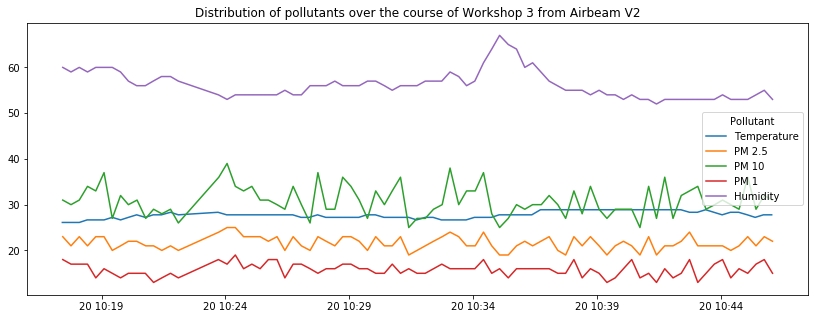

In [11]:
figsize(14, 5)

plt.plot(w4[1].Timestamp[::20],((w4[1].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w4[4].Timestamp[::20],w4[4].Value[::20], label = "PM 2.5")
plt.plot(w4[3].Timestamp[::20],w4[3].Value[::20], label = "PM 10")
plt.plot(w4[2].Timestamp[::20],w4[2].Value[::20], label = "PM 1")
plt.plot(w4[0].Timestamp[::20],w4[0].Value[::20], label = "Humidity")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 4 from Airbeam V2")
plt.yscale('linear')
plt.show()


# Workshop 5

In [7]:
filenames = os.listdir("data/Workshop Data/Workshop 5")

for i in range(len(filenames)):
    print(i, " - ", filenames[i])
    filenames[i] = "data/Workshop Data/Workshop 5/" + filenames[i]

#filenames = filenames[-5:]

w5 = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    w5[i]["Timestamp"] = pd.to_datetime(w5[i].Timestamp)
    w5[i] = w5[i].sort_values(by=['Timestamp'])
    
print()
    
# Read in the data
w5_percep = pd.read_csv("data/Workshop data/Perception/W5_perception_clean.csv",float_precision = 'high')

# Check the results
# print(w3_percep.head(5))
print("Airbeam length -", len(w5[1]))


0  -  Airbeam V2 - b - PM 2.5.csv
1  -  Airbeam V2 - b - PM 10.csv
2  -  Airbeam V2 - a - PM1.csv
3  -  Airbeam V2 - a - Humidity.csv
4  -  mic.csv
5  -  Airbeam V2 - b - Humidity.csv
6  -  Airbeam V2 - a - PM 10.csv
7  -  Airbeam V2 - a - Temperature.csv
8  -  Airbeam V2 - b - PM 1.csv
9  -  Airbeam V2 - a - PM 2.5.csv
10  -  Airbeam V2 - b - Temperature.csv

Airbeam length - 2865


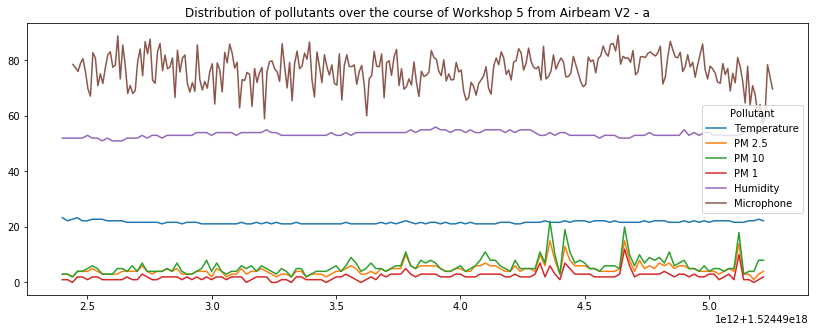

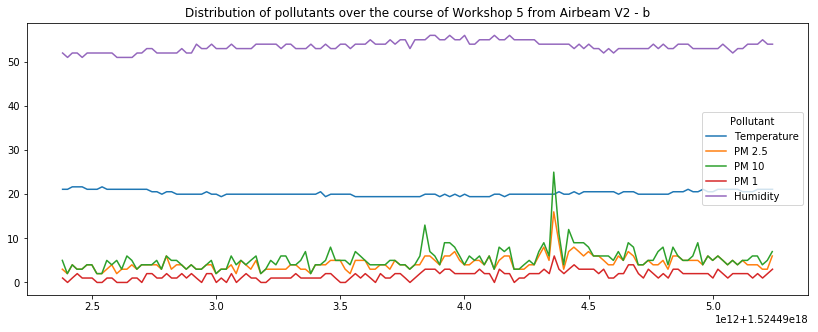

In [8]:
figsize(14, 5)

plt.plot(w5[7].Timestamp[::20],((w5[7].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w5[9].Timestamp[::20],w5[9].Value[::20], label = "PM 2.5")
plt.plot(w5[6].Timestamp[::20],w5[6].Value[::20], label = "PM 10")
plt.plot(w5[2].Timestamp[::20],w5[2].Value[::20], label = "PM 1")
plt.plot(w5[3].Timestamp[::20],w5[3].Value[::20], label = "Humidity")
plt.plot(w5[4].Timestamp[::20],w5[4].Value[::20], label = "Microphone")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 5 from Airbeam V2 - a")
plt.yscale('linear')
plt.show()

plt.plot(w5[10].Timestamp[::20],((w5[10].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w5[0].Timestamp[::20],w5[0].Value[::20], label = "PM 2.5")
plt.plot(w5[1].Timestamp[::20],w5[1].Value[::20], label = "PM 10")
plt.plot(w5[8].Timestamp[::20],w5[8].Value[::20], label = "PM 1")
plt.plot(w5[5].Timestamp[::20],w5[5].Value[::20], label = "Humidity")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 5 from Airbeam V2 - b")
plt.yscale('linear')
plt.show()


# Workshop 6

In [3]:
filenames = os.listdir("data/Workshop Data/Workshop 6")

for i in range(len(filenames)):
    print(i, " - ", filenames[i])
    filenames[i] = "data/Workshop Data/Workshop 6/" + filenames[i]

#filenames = filenames[-5:]

w6 = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    w6[i]["Timestamp"] = pd.to_datetime(w6[i].Timestamp)
    w6[i] = w6[i].sort_values(by=['Timestamp'])
    
print()
    
# Read in the data
w6_percep = pd.read_csv("data/Workshop data/Perception/W6_perception_clean.csv",float_precision = 'high')

# Check the results
# print(w3_percep.head(5))
print("Airbeam length -", len(w6[1]))


0  -  Airbeam V2 - b - PM 2.5.csv
1  -  Airbeam V2 - b - PM 10.csv
2  -  Airbeam V2 - a - PM1.csv
3  -  Airbeam V2 - a - Humidity.csv
4  -  Airbeam V2 - b - Humidity.csv
5  -  Airbeam V2 - a - PM 10.csv
6  -  Airbeam V2 - a - Temperature.csv
7  -  Microphone.csv
8  -  Airbeam V2 - a - PM 2.5.csv
9  -  Airbeam V2 - b - PM1.csv
10  -  Airbeam V2 - b - Temperature.csv

Airbeam length - 1964


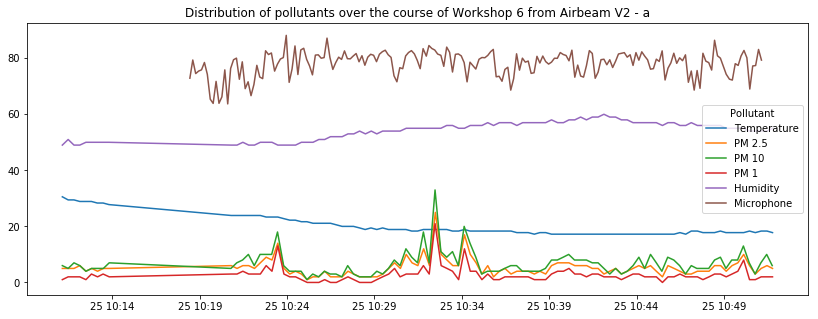

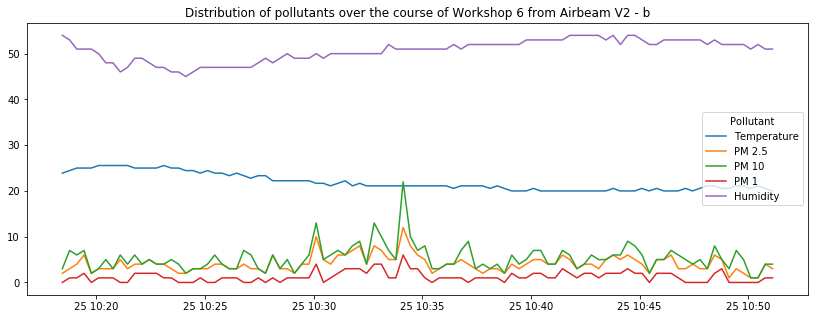

In [4]:
figsize(14, 5)

plt.plot(w6[6].Timestamp[::20],((w6[6].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w6[8].Timestamp[::20],w6[8].Value[::20], label = "PM 2.5")
plt.plot(w6[5].Timestamp[::20],w6[5].Value[::20], label = "PM 10")
plt.plot(w6[2].Timestamp[::20],w6[2].Value[::20], label = "PM 1")
plt.plot(w6[3].Timestamp[::20],w6[3].Value[::20], label = "Humidity")
plt.plot(w6[7].Timestamp[::20],w6[7].Value[::20], label = "Microphone")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 6 from Airbeam V2 - a")
plt.yscale('linear')
plt.show()

plt.plot(w6[10].Timestamp[::20],((w6[10].Value[::20]-32)*5)/9, label = "Temperature")
plt.plot(w6[0].Timestamp[::20],w6[0].Value[::20], label = "PM 2.5")
plt.plot(w6[1].Timestamp[::20],w6[1].Value[::20], label = "PM 10")
plt.plot(w6[9].Timestamp[::20],w6[9].Value[::20], label = "PM 1")
plt.plot(w6[4].Timestamp[::20],w6[4].Value[::20], label = "Humidity")
plt.legend(title="Pollutant", loc="center right")
plt.title("Distribution of pollutants over the course of Workshop 6 from Airbeam V2 - b")
plt.yscale('linear')
plt.show()

# Results and analysis (updated)


### Data Validation
Recommendation is something new we’ve been working on. I.e. collect data and then looking at the gaps to see how to improve understanding of AQ around the area. By suggesting areas where our predictions have higher errors will help with building a better model of the area.

To grow this, we would maybe like to work with community centers or schools in more remote areas (in between sensors) to implement low-cost AQ sensors that feed into our model and use this to host targeted workshops in areas of higher model error.

We already collect data from open source, high quality sensors. Using low cost sensors allows us to fill in the gaps while also providing food for thought and a discussion of the impact of air quality in the community.

During our workshops, we collected data using handheld “Airbeam” devices. So far we’ve seen that the readings from the low quality devices, with a certain margin of error, tend to follow the same trends as our predictions. However there are some data point that don’t quite line up.

Along with recording their perceptions, participants were also asked to take photos of what they believe are the main factors influencing their feelings towards the AQ. Additionally we’re also measuring noise and correlating their perceptions to that.

### Citizen engagement

Affecting legislature and infrastructure may take time and deeper studies before the evidence we provide here can be taken as fact. But in the meantime, what citizen initiatives can we promote? For this, we want to look at some of the factors that influence perception and say based on our findings from photos taken and data collected that for example (a purely hypothetical example) - noisy/messy park areas are misperceived to have bad air quality, so can bringing down the noise/cleaning up lead to better perceptions and/or a better sense of wellbeing for the community. Short term wins.

## Questions to ask

With all this data collected, we’re exploring the following questions and testing a few hypotheses. 

Firstly, the main question is are humans a good enough substitute to sensors? 

Secondly, how confident can we be that humans perceive correctly and if not what are they perceiving correctly?

Lastly, how can we use human “sensors” to correct for local errors in our predictions (i.e. errors due to traffic or pollutant emitters localised and not picked up in our model)? Basically how can we (if indeed we can) use perception as an indicator that there is something not affecting the large sensors but having an extreme local effect?


